In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

Load Dataset

In [82]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
type(california)

sklearn.utils._bunch.Bunch

In [83]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [84]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [85]:
print(california.target_names)

['MedHouseVal']


In [86]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [87]:
print(california.frame)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

Preparing The Dataset

In [88]:
dataset = pd.DataFrame(california.data)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [89]:
dataset['Price'] = california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [91]:
# Checking missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [92]:
# Data analysis

dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [93]:
dataset = dataset.drop(columns=['Latitude', 'Longitude'])

In [94]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


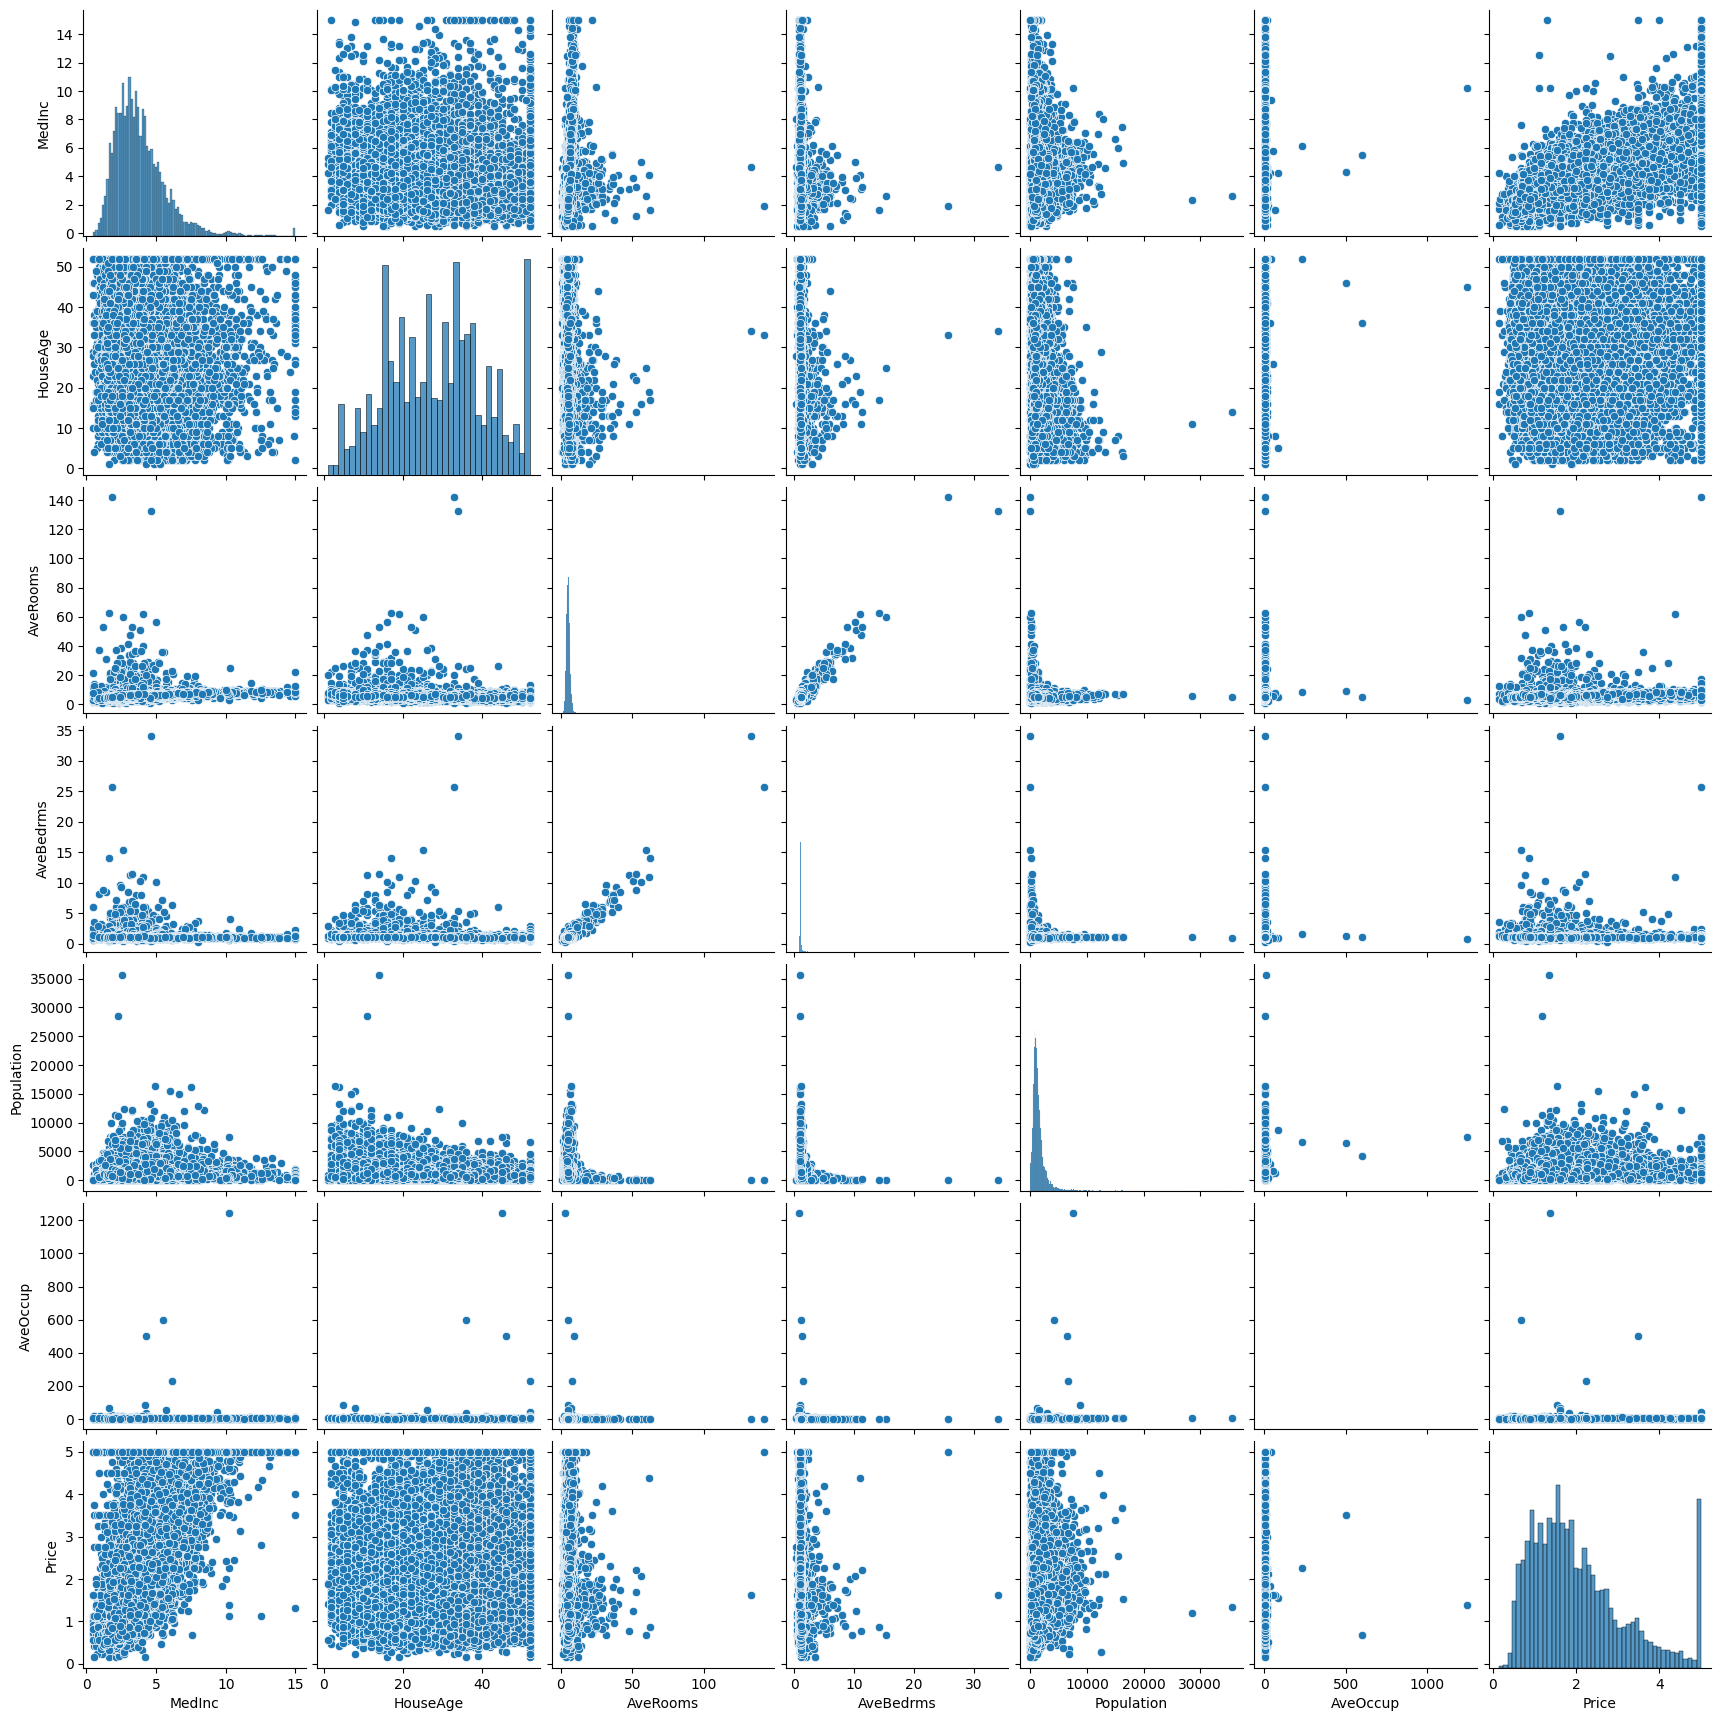

In [95]:
import seaborn as sns


sns.pairplot(dataset)

Text(0, 0.5, 'Price')

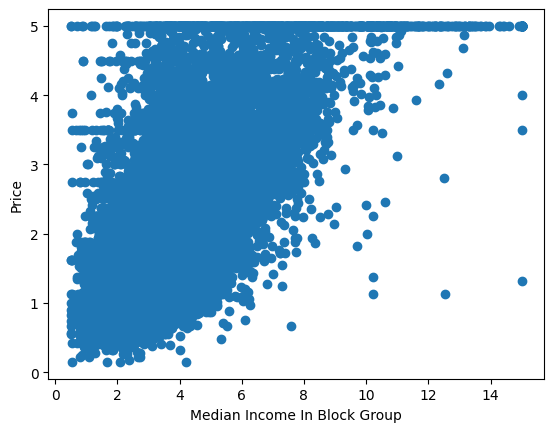

In [96]:
plt.pyplot.scatter(dataset['MedInc'], dataset['Price'])
plt.pyplot.xlabel('Median Income In Block Group')
plt.pyplot.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

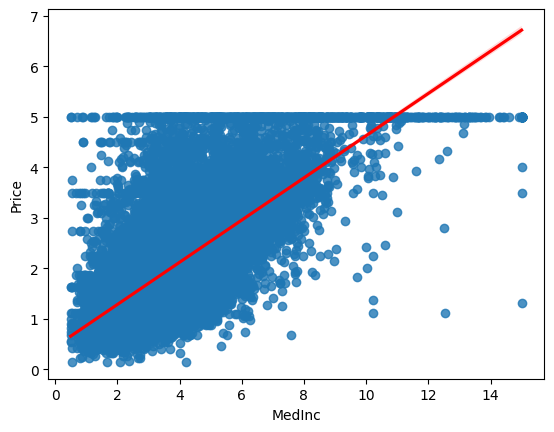

In [97]:
import seaborn as sns
sns.regplot(x="MedInc", y="Price", data=dataset, line_kws={"color": "red"})

Text(0, 0.5, 'Price')

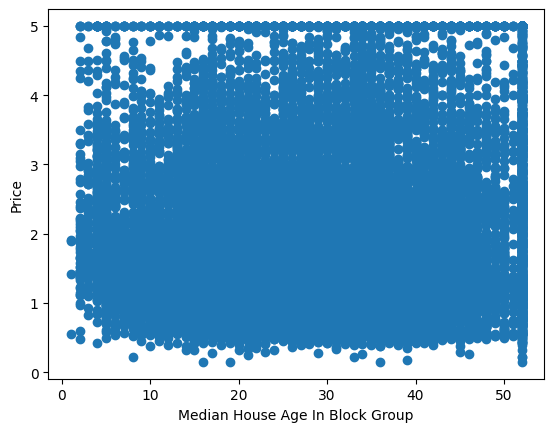

In [98]:
plt.pyplot.scatter(dataset['HouseAge'], dataset['Price'])
plt.pyplot.xlabel('Median House Age In Block Group')
plt.pyplot.ylabel('Price')

Text(0, 0.5, 'Price')

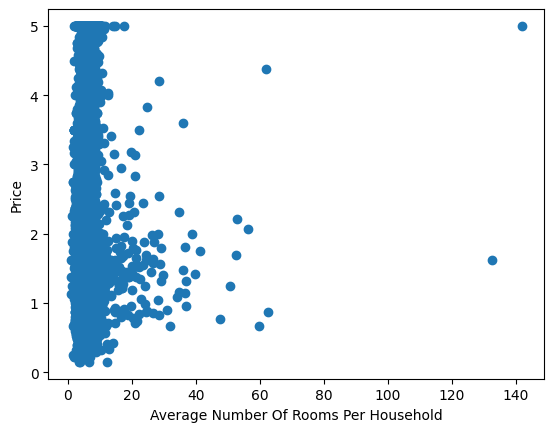

In [99]:
plt.pyplot.scatter(dataset['AveRooms'], dataset['Price'])
plt.pyplot.xlabel('Average Number Of Rooms Per Household')
plt.pyplot.ylabel('Price')

In [100]:
# Split the dataset into X and y

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [101]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [102]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [103]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
# Standartize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
X_train = scaler.fit_transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

In [107]:
X_train

array([[-0.15431396,  1.78171895,  0.25936553, -0.03790948, -0.6305216 ,
        -0.06214807],
       [-0.24101874,  0.67097311, -0.05656021, -0.23443775, -0.76531402,
        -0.02332191],
       [-1.29977753, -0.83646768, -0.24376341,  0.2065965 ,  1.13140794,
         0.01625458],
       ...,
       [-0.90979275,  1.86105794,  0.28482758,  0.28538792, -0.75743654,
         0.1085688 ],
       [ 0.09315483, -0.91580667, -0.22847391,  0.02638431,  0.40580457,
         0.11446109],
       [ 0.57742106,  1.14700704,  0.32393202, -0.24612974, -0.37844226,
         0.02652446]])

In [108]:
X_test

array([[-4.52791842e-01,  5.91634119e-01,  6.16726949e-02,
        -6.76811396e-02, -5.82381446e-01,  3.20001319e-02],
       [-7.27899451e-01, -7.57128689e-01,  2.97619810e-01,
         3.56270109e-01, -9.86758718e-01, -3.18782059e-02],
       [ 7.63689614e-01, -4.39772734e-01,  5.77262624e-01,
        -1.09498821e-01, -2.14765745e-01, -4.49234112e-04],
       ...,
       [-1.02499006e+00,  8.29651085e-01,  5.52979427e-02,
        -1.15181775e-01, -5.14985234e-01, -4.00850751e-02],
       [ 4.86346529e+00, -4.39772734e-01,  1.15000519e+00,
        -1.18892240e-01, -7.47216683e-02, -1.62940942e-02],
       [-2.30240671e-01,  5.12295130e-01,  1.86334517e-01,
        -1.33514220e-01, -2.81286681e-01, -2.31812714e-04]])

Model Training

In [109]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [110]:
model.fit(X_train, y_train)

LinearRegression()

In [111]:
print(model.coef_) # weights

[ 1.02593598  0.20930869 -0.54339237  0.49981474  0.02882063 -0.0607039 ]


In [112]:
print(model.intercept_) # bias

2.0639319153746767


In [113]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [114]:
preds = model.predict(X_test)
preds

array([1.637163  , 1.1485209 , 2.38080867, ..., 1.08598401, 6.27599515,
       1.75886963])

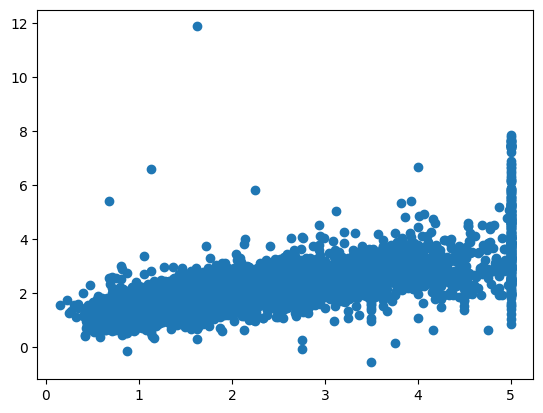

In [115]:
# scatter plot for the prediction
plt.pyplot.scatter(y_test, preds)

In [116]:
vars = y_test - preds
vars

12708   -0.607163
3352    -0.507521
20362    0.095191
2142    -0.270569
8661     0.884764
           ...   
17381    0.609847
19566   -0.258770
13540   -0.195984
18362   -1.275985
9058    -0.755870
Name: Price, Length: 5160, dtype: float64

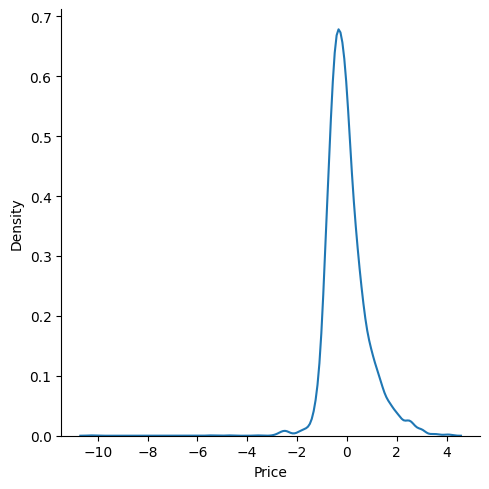

In [117]:
sns.displot(vars, kind="kde")

In [118]:
from sklearn.metrics import root_mean_squared_error

print("Error: ", root_mean_squared_error(y_test, preds))

Error:  0.8115838649936798


In [119]:
print(y_test.describe()) 

count    5160.000000
mean        2.082437
std         1.182868
min         0.149990
25%         1.180750
50%         1.791000
75%         2.681250
max         5.000010
Name: Price, dtype: float64


In [120]:
print("Min:", y_test.min(), "Max:", y_test.max())

Min: 0.14999 Max: 5.00001


R square 

formula:
R²=1−SSres/SStot

where:
SSres = Sum of squares of residuals (unexplained variance).
SStot = Total sum of squares (total variance in the dependent variable).
R² ranges from 0 to 1.

In [122]:
from sklearn.metrics import r2_score
score = r2_score(y_test, preds)
print(score)

0.5291543625643514


Adjusted R²=1−( (1−R²)(n−1) / (n−k−1) )

where: n = Number of observations
k = Number of independent variables (predictors)

In [123]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5286061239024819